# ANÁLISIS EXPLORATORIO Y PREDICTIVO SOBRE UN DATA SET DE VINOS.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Carga del data set y vista informativa de como esta compuesto el mismo.
data = pd.read_csv("./winequality-red.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#### Cambiamos los nombres de las columnas para que sea mas legible.
data = data.rename(columns={"fixed acidity":"acidez_fija","volatile acidity":"acidez_volatil","citric acid":"acido_citrico",
                            "residual sugar":"azucar_residual","chlorides":"cloruros",
                            "free sulfur dioxide":"anhidrido_sulfuroso_libre",
                            "total sulfur dioxide":"anhidrido_sulfuroso_total","density":"densidad","pH":"ph",
                            "sulphates":"sulfatos","alcohol":"vol_alcohol","quality":"calidad"})

In [37]:
### Comportamiento de los datos
data.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,anhidrido_sulfuroso_libre,anhidrido_sulfuroso_total,densidad,ph,sulfatos,vol_alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
### Veremos si contenemos valores nulos
print(data.isnull().sum())

acidez_fija                  0
acidez_volatil               0
acido_citrico                0
azucar_residual              0
cloruros                     0
anhidrido_sulfuroso_libre    0
anhidrido_sulfuroso_total    0
densidad                     0
ph                           0
sulfatos                     0
vol_alcohol                  0
calidad                      0
dtype: int64


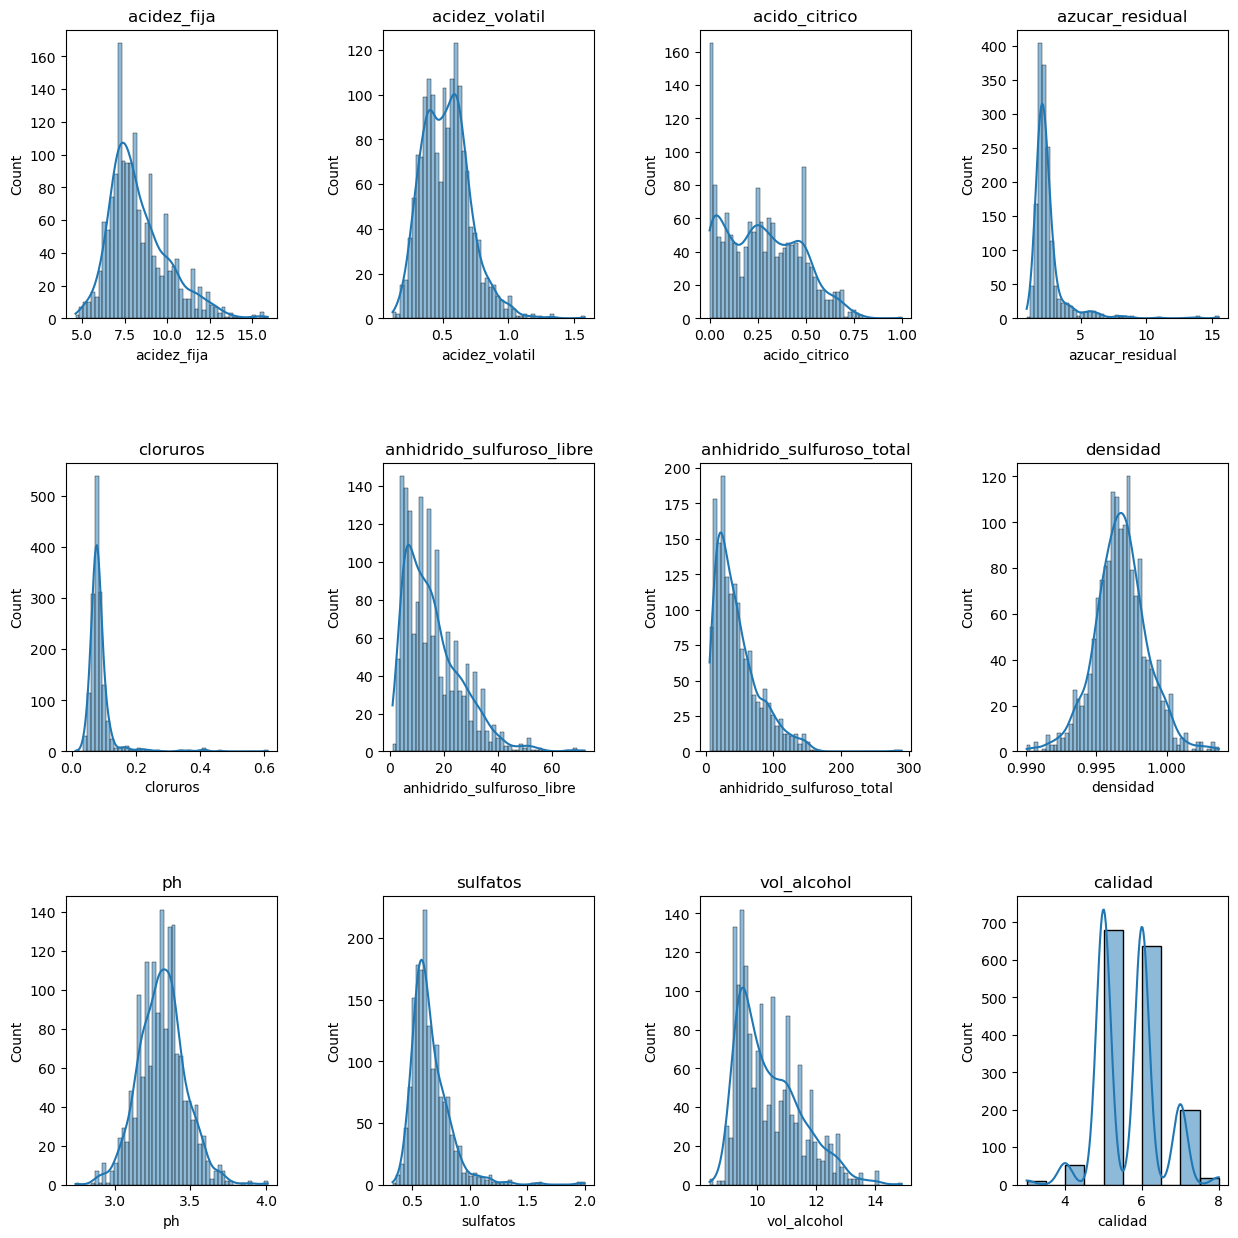

In [6]:
#### Vista grafica de como se comportan cada variable

fig, ax = plt.subplots(nrows = 3 , ncols= 4 , figsize=(15,15))
fig.subplots_adjust(wspace = 0.5 , hspace = 0.5)

for i ,col in enumerate(data):
    if col == "calidad":
        nbins = 10 
    else:
        nbins = 50
    sns.histplot(x=col , data=data , ax=ax[i//4][i%4], bins=nbins, kde=True)
    ax[i//4][i%4].set_title(col)
    

* ## Vemos comose comportan los datos en forma grafica. 
    * **Acidez_fija** : Media = 8.31 
    * **Acidez_volatil** : Media = 0.52
    * **Acido_citrico** : Media = 0.27 
    * **Azucar_residual** : Media = 2.53
    * **Cloruros** : Media = 0.087
    * **Anhidrido_sulfuroso_libre** : Media = 15.87
    * **anhidrido_sulfuroso_total** : Media = 46.46
    * **Densidad** : Media = 0.99
    * **PH** : Media = 3.31 
    * **Sulfatos** : Media = 0.65 
    * **Volumen_alcohol** : Media = 10.42
    * **CALIDAD** : Media = 5.63
-----

* # Creamos algunos gráficos y asi saber cómo se distribuyen las columnas en el conjunto de datos.

<AxesSubplot:xlabel='calidad', ylabel='acidez_fija'>

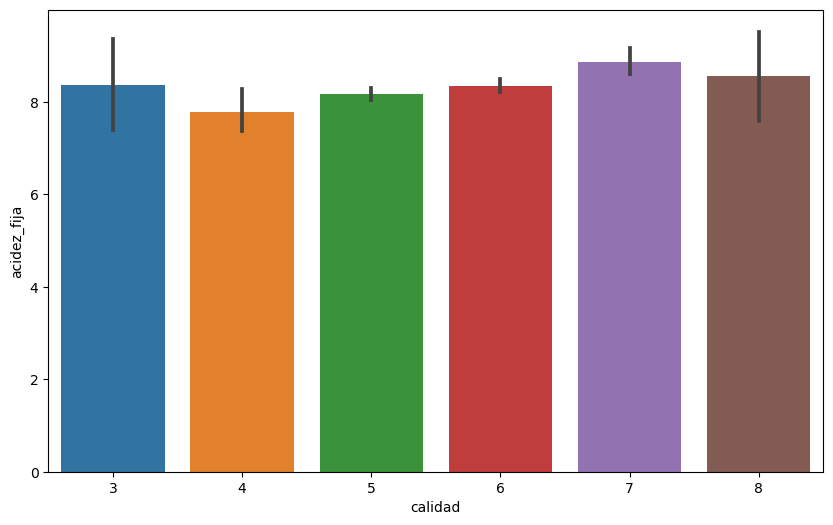

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'acidez_fija', data = data)

* ### Aquí vemos que la acidez fija no da ninguna especificación para clasificar la calidad.
---

<AxesSubplot:xlabel='calidad', ylabel='acidez_volatil'>

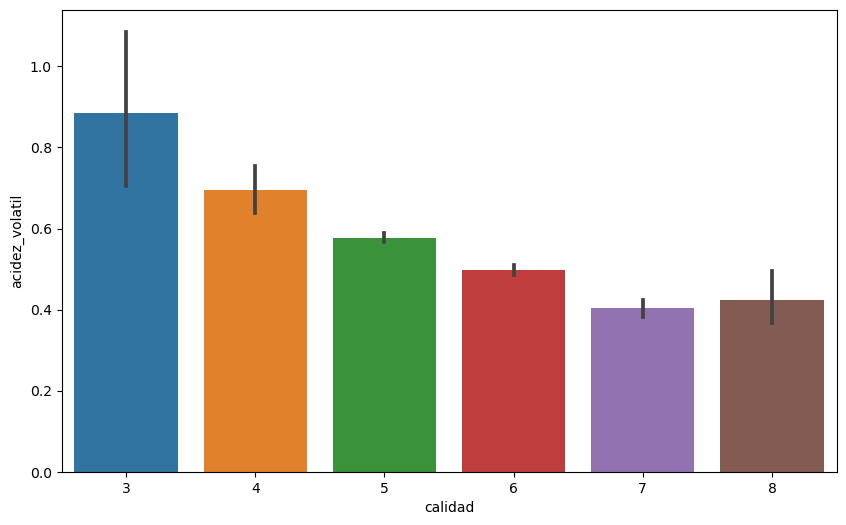

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'acidez_volatil', data = data)

* ### Aca vemos que es una tendencia a la baja en la acidez volátil a medida que subimos la calidad del vino.
----

<AxesSubplot:xlabel='calidad', ylabel='acido_citrico'>

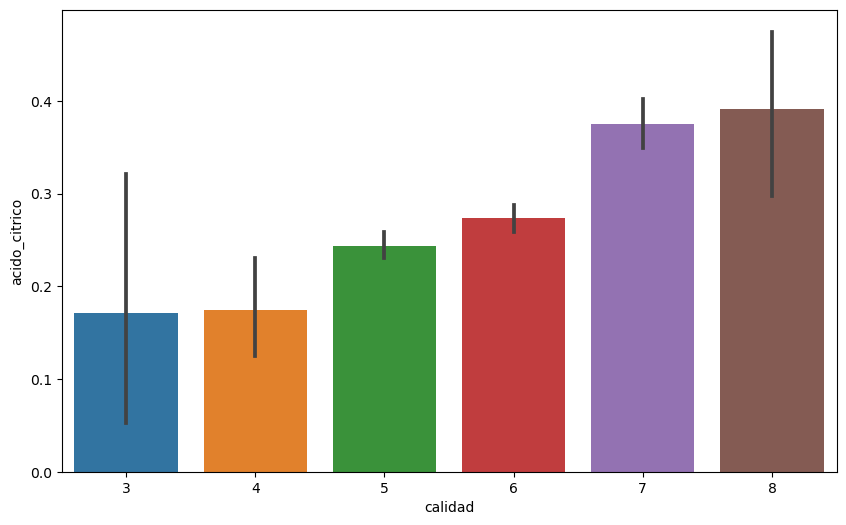

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'acido_citrico', data = data)

* ### La composición de ácido cítrico aumenta a medida que aumenta la calidad del vino
----

<AxesSubplot:xlabel='calidad', ylabel='azucar_residual'>

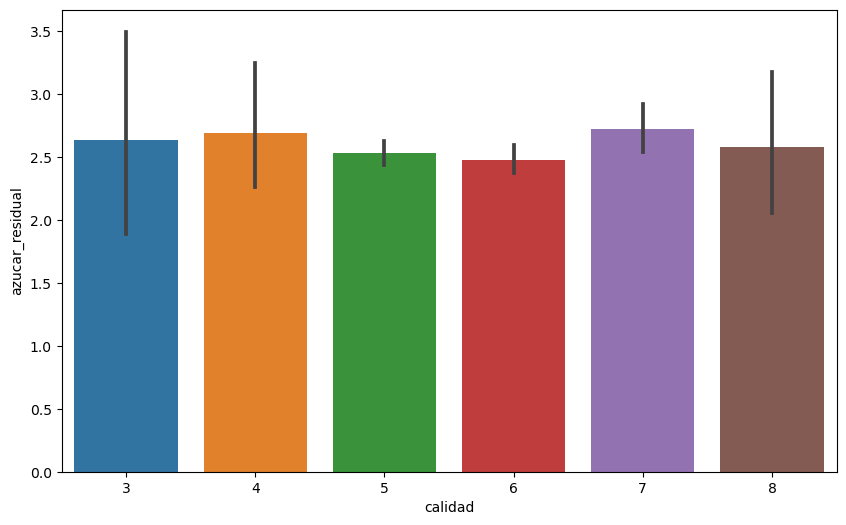

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'azucar_residual', data = data)

* ### La cantidad de azucar residual no infiere mucho sobre la calidad del vino.
----

<AxesSubplot:xlabel='calidad', ylabel='cloruros'>

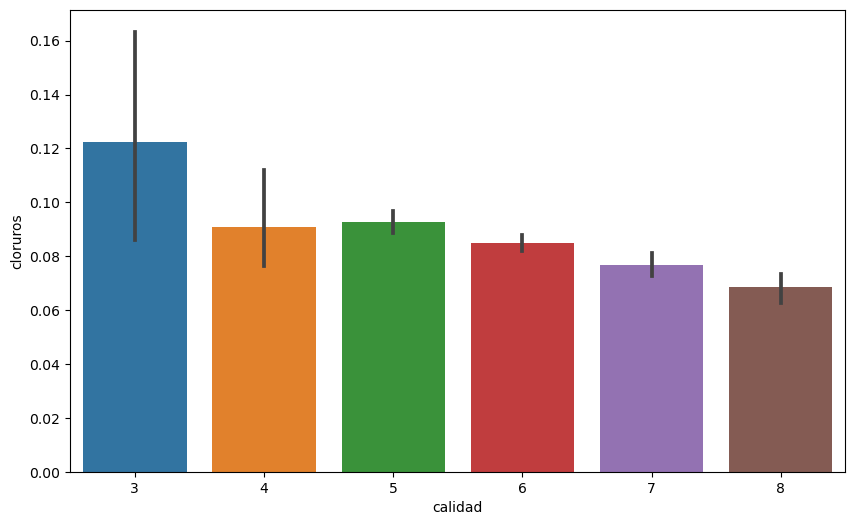

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'cloruros', data = data)

* ### La composición de cloruros también baja a medida que subimos en la calidad del vino
---

<AxesSubplot:xlabel='calidad', ylabel='anhidrido_sulfuroso_libre'>

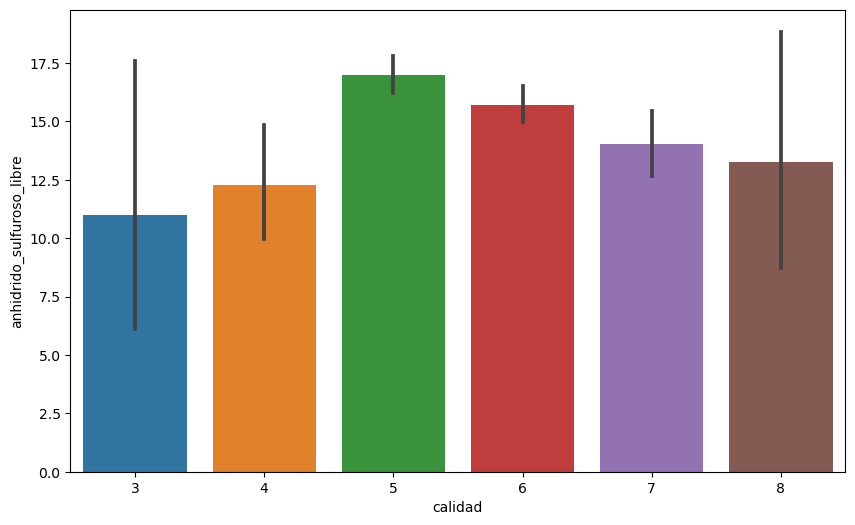

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'anhidrido_sulfuroso_libre', data = data)

* ### Pareciera que no infiere mucho el anhidrido sulfuroso libre, Pero si se puede ver un leve cambio de gama "baja" a la "media".
----

<AxesSubplot:xlabel='calidad', ylabel='anhidrido_sulfuroso_total'>

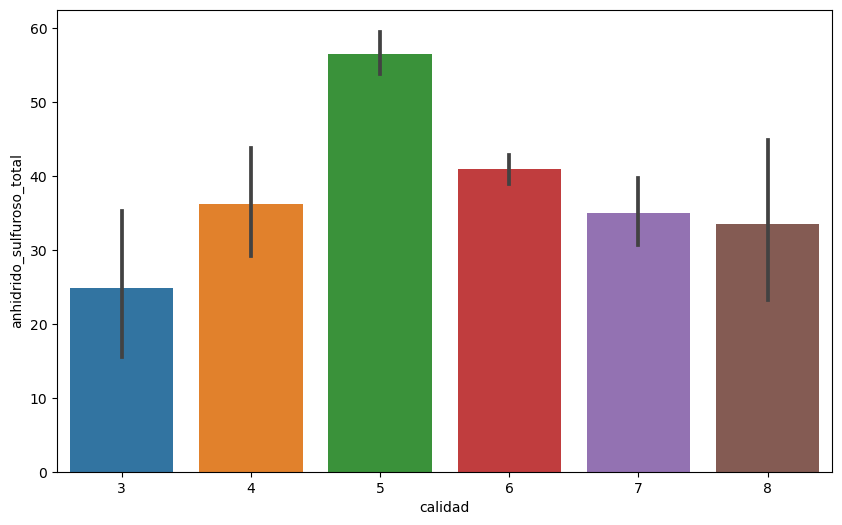

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'anhidrido_sulfuroso_total', data = data)

* ### Vemos que ocurre lo mismo con anhidrido sulfuroso total, hay un cambio drastico de la gama BAJA y la MEDIA.
-----

<AxesSubplot:xlabel='calidad', ylabel='sulfatos'>

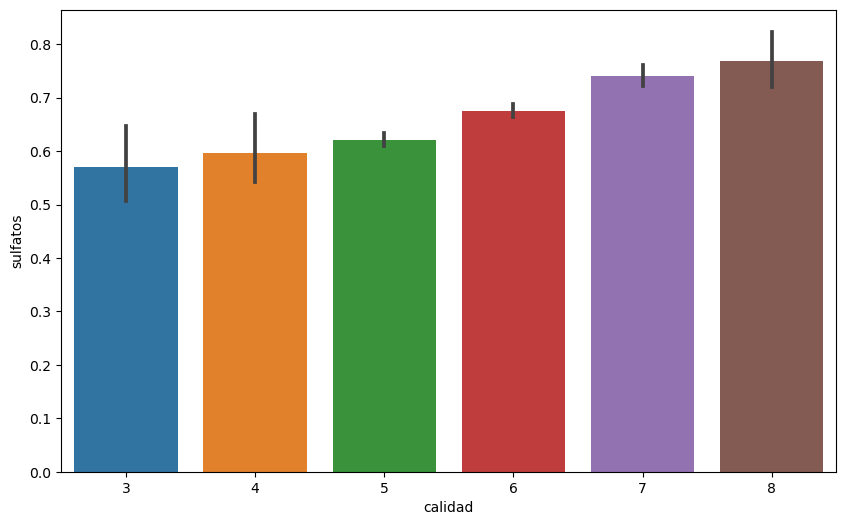

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'sulfatos', data = data)

* ### Se observa que el nivel de sulfatos aumenta con la calidad del vino progresivamente.
----

<AxesSubplot:xlabel='calidad', ylabel='vol_alcohol'>

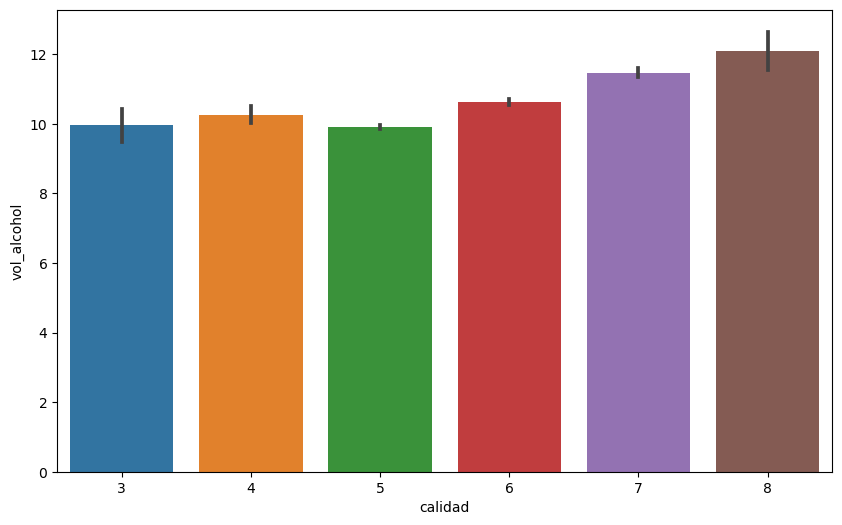

In [31]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'vol_alcohol', data = data)

* ### Se observa que el nivel de alcohol también sube a medida que aumenta la calidad del vino, pero muy levemente con una diferencia entre la calidad baja y buena que entre el %10 y %12.
---

----
* # Frecuencia de la calidad en los vinos. 

<AxesSubplot:xlabel='calidad', ylabel='calidad'>

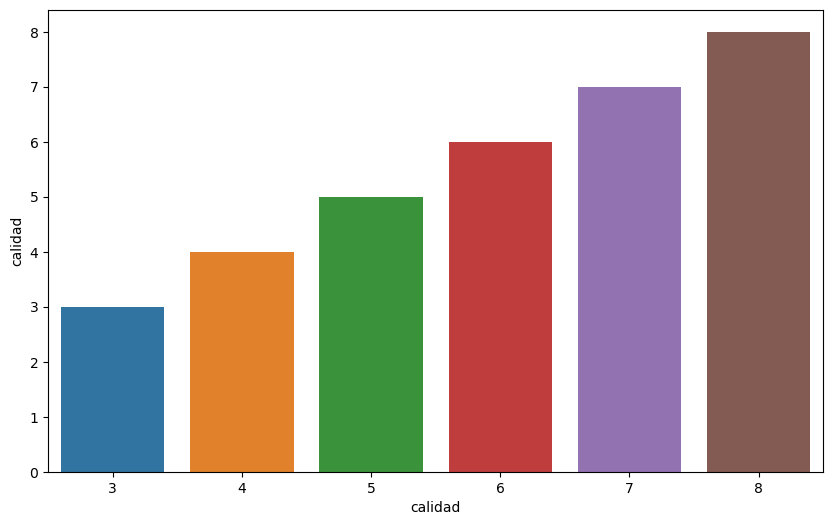

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'calidad', y = 'calidad', data = data)

In [36]:
# Aca vemos la frecuencia de los vinos pero en numeros.
frecuencia_calidad = pd.Series(data["calidad"]).value_counts()
frecuencia_calidad

5    681
6    638
7    199
4     53
8     18
3     10
Name: calidad, dtype: int64

----
* ## Miraremos su correlación 

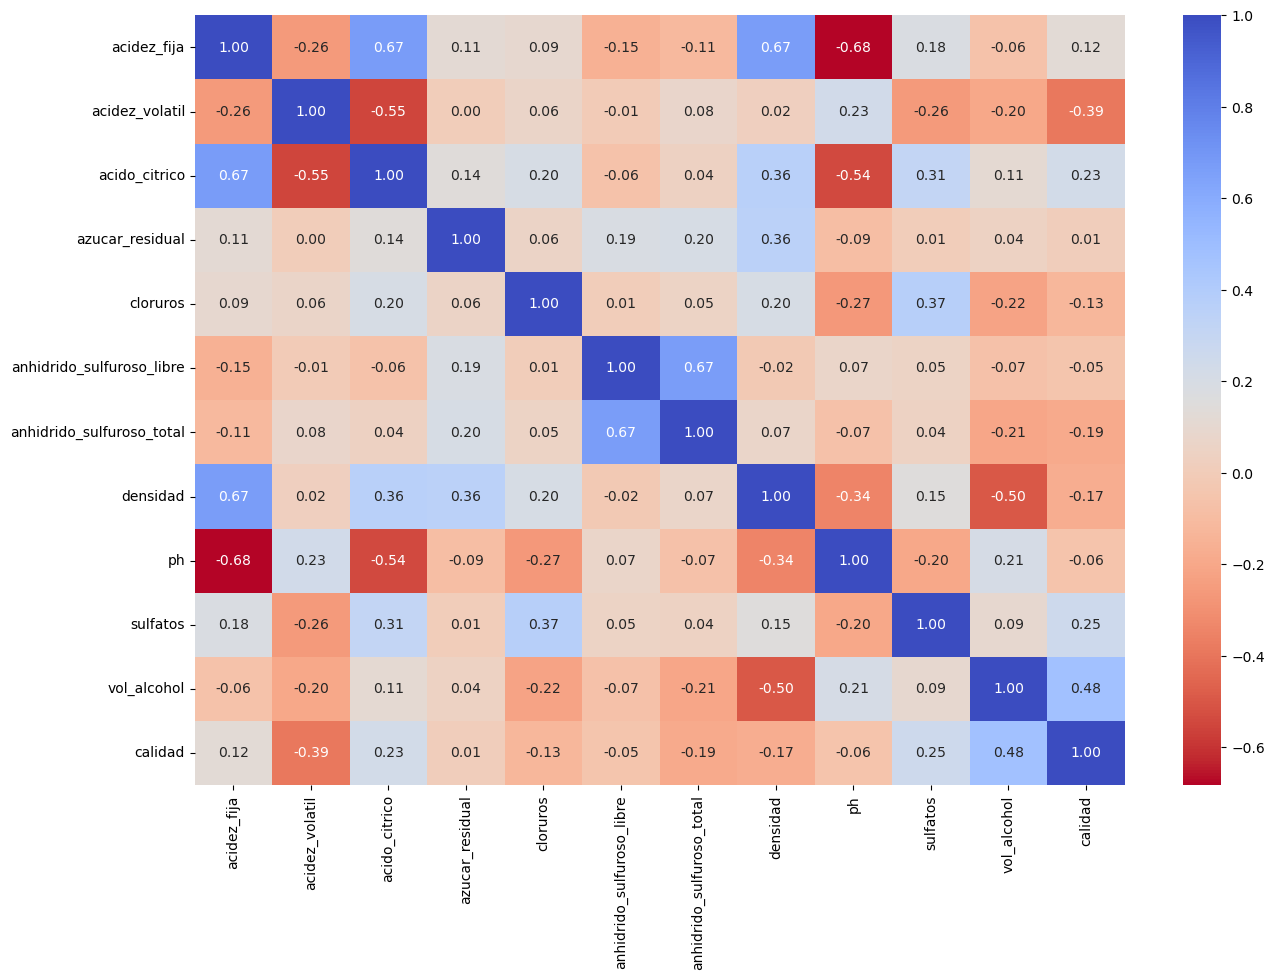

In [8]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()

In [25]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
X = data[['acidez_fija', 'acidez_volatil', 'acido_citrico','azucar_residual', 'cloruros', 'anhidrido_sulfuroso_libre',
          'anhidrido_sulfuroso_total', 'densidad', 'ph', 'sulfatos','vol_alcohol']]

y = data[["calidad"]]

In [34]:
#### Separamos los datos en entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [41]:
#### Creamos la instancia de KNN y luego lo entrenamos
knn = KNeighborsRegressor(n_neighbors=5) # 5 es el numero predeterminado , si agregamos mas creo que no es conveniente
knn.fit(X_train , y_train)

KNeighborsRegressor()

In [42]:
y_pred = knn.predict(X_test)

In [45]:
#### Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

##### Calculamo el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 0.5290833333333332
Coeficiente de determinación (R2): 0.16551455034604579


* ## Basándonos en los resultados que obtuvimos, el modelo de KNN que construimos parece tener un desempeño limitado para este conjunto de datos en particular.
-----

---
* # REGRESIÓN LINEAL MULTIPLE.
    * ### Primero haremos una regresión con "RFE" (usar las variables que python considere mejor, es decir cuales son las que mejor se ajustan al modelo). Luego con todas las variables predictoras

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [49]:
#### Tenemos 11 variables predictoras (elegiremos las 5 que mejor se ajusten al modelo) 
estimador = SVR(kernel="linear")
selector = RFE(estimador , n_features_to_select=5, step=1)

### Entrenamos el RFE 
selector.fit(X,y)
print(selector.ranking_)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversio

[3 1 2 5 1 6 7 4 1 1 1]


## Las mejores 5 variables para el modelo predictivo segun RFE de sklearn son: 
   * ### acidez volatil , cloruros , ph , sulfatos , vol_alcohol.
------

In [52]:
### Segun Sklearn las mejores predictoras son las siguientes:
X = data[['acidez_volatil','cloruros','ph', 'sulfatos','vol_alcohol']]

In [53]:
## Separamos los datos en entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [54]:
### Entrenamos y ajustamos el modelos con los datos de entrenamiento
lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression()

In [59]:
y_pred = lm.predict(X_test)

#### Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

##### Calculamo el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): %", mse*100)
print(f"Coeficiente de determinación (R2) %:", r2*100)

Error cuadrático medio (MSE): % 41.69056114316725
Coeficiente de determinación (R2) %: 34.24444795360226


* ## obtenemos un modelo mejor comparandolo con el KNN. Pero aun asi es bajo en predecir el modelo. Usaremos todas las variables y luego otros modelos.
----
* # REGRESIÓN LINEAL (todas las variables).

In [60]:
X = data[['acidez_fija', 'acidez_volatil', 'acido_citrico','azucar_residual', 'cloruros', 'anhidrido_sulfuroso_libre',
          'anhidrido_sulfuroso_total', 'densidad', 'ph', 'sulfatos','vol_alcohol']]

y = data[["calidad"]]

In [64]:
### Entrenamos y ajustamos el modelos con los datos de entrenamiento
lm = LinearRegression()
lm.fit(X , y)

LinearRegression()

In [66]:
y_pred = lm.predict(X)

#### Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)

##### Calculamo el coeficiente de determinación (R2)
r2 = r2_score(y, y_pred)

print(f"Error cuadrático medio (MSE): %", mse*100)
print(f"Coeficiente de determinación (R2) %:", r2*100)

Error cuadrático medio (MSE): % 41.676716722140796
Coeficiente de determinación (R2) %: 36.055170303868834


* ## Obtenemos lo mismo resultados usando todas las variables y las recomendadas por python sklearn, usando el metodo RFE.
----
* # Árbol de decisión

In [72]:
columnas = data.columns.values.tolist()
predictoras = columnas[:11]
target = columnas[11]

In [73]:
data.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,anhidrido_sulfuroso_libre,anhidrido_sulfuroso_total,densidad,ph,sulfatos,vol_alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
data_train = data

data_train["train"] = (np.random.uniform(0,1,len(data))<=0.75).astype(int)

(array([ 386.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1213.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

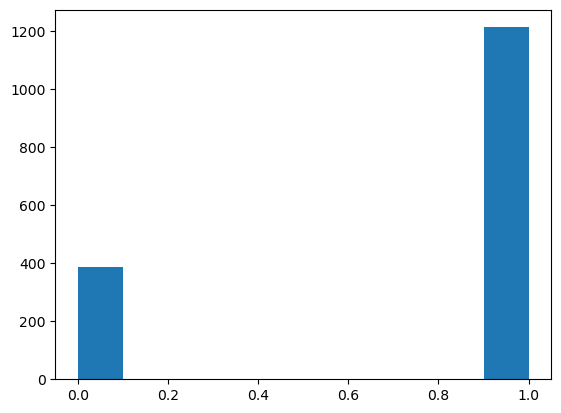

In [77]:
plt.hist(data.train)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
train , test = data[data["train"] == True ] , data[data["train"] == False]

In [80]:
tree = DecisionTreeClassifier(criterion="entropy" , min_samples_split=25 , random_state=42)
tree.fit(train[predictoras] , train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=25,
                       random_state=42)

In [81]:
preds = tree.predict(test[predictoras])
pd.crosstab(test[target] , preds, rownames=["actual"] , colnames=["predictions"])

predictions,3,4,5,6,7,8
actual,,,,,,
3,0,0,1,1,1,0
4,1,1,5,2,0,0
5,1,5,119,43,3,0
6,0,1,40,95,16,2
7,0,0,5,30,10,1
8,0,0,0,1,2,0


In [82]:
print(f"Eficacia del modelo: %{tree.score(test[predictoras], test[target])*100:.2f}")

Eficacia del modelo: %58.29


* ### Creamos una crostab para ver como se comportaron las predicciones.
* ### Vemos que el modelo tiene una mejora buena en comparación con lo dos modelos creados anteriormente, pero aun asi se puede mejorar mucho mas el modelo.
----

# LUEGO SEGUIREMOS HACIENDO RANDON FOREST PARA MEJORAR EL MODELO O REDES NEURONALES.
-----

----
* # RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [104]:
forest = RandomForestClassifier(n_jobs=2 , oob_score=True , n_estimators=400)
forest.fit(X,y)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11920\1876524122.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X,y)


RandomForestClassifier(n_estimators=400, n_jobs=2, oob_score=True)

In [105]:
print(f"Eficacia del modelo para el random forest: %{forest.oob_score_*100:.2f}")

Eficacia del modelo para el random forest: %72.30


* ## El resultado del Random Forest subio bastante, es del %72.30 en la predicción
---
* # RANDOM FOREST (rescalado)


In [107]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [109]:
X = data[['acidez_fija', 'acidez_volatil', 'acido_citrico','azucar_residual', 'cloruros', 'anhidrido_sulfuroso_libre',
          'anhidrido_sulfuroso_total', 'densidad', 'ph', 'sulfatos','vol_alcohol']]

y = data[["calidad"]]

In [110]:
## Separamos los datos en entrenamiento y test
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

In [111]:
### Rescalar las variables
sc = StandardScaler()

In [112]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [113]:
forest_scaler = RandomForestClassifier(n_estimators=200)
forest_scaler.fit(X_train , y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11920\473511182.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_scaler.fit(X_train , y_train)


RandomForestClassifier(n_estimators=200)

In [117]:
y_pred = forest_scaler.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy*100)

Exactitud: 65.0


In [126]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(classification_report)

Informe de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.70      0.77      0.73       195
           6       0.62      0.68      0.65       200
           7       0.57      0.41      0.48        61
           8       0.00      0.00      0.00         6

    accuracy                           0.65       480
   macro avg       0.31      0.31      0.31       480
weighted avg       0.61      0.65      0.63       480



C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

* # Random Forest:
    * ## Obtenemos un resultado de %65 con el Escalado estandar. Vemos que es mejor dejar los resultado como estan, en el cual obtuvimos un %72.30. Lo siguiente que haremos es dividir en grupos la calidad (Buena , media o baja) para asi tener una mejor efiacia del modelo predictivo.
----

-----
* # RANDOM FOREST (calidad categorizada)

In [155]:
data['calidad_categorizada'] = pd.cut(data['calidad'], bins=[2.5, 4, 6.0 , 8], labels=['malo', 'medio', 'bueno'])
data.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,anhidrido_sulfuroso_libre,anhidrido_sulfuroso_total,densidad,ph,sulfatos,vol_alcohol,calidad,train,calidad_categorizada
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,medio
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,medio
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,medio
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,medio
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,medio


In [150]:
frecuencia_calidad = pd.Series(data["calidad"]).value_counts()
frecuencia_calidad

5    681
6    638
7    199
4     53
8     18
3     10
Name: calidad, dtype: int64

In [156]:
frecuencia_calidad = pd.Series(data["calidad_categorizada"]).value_counts()
frecuencia_calidad

medio    1319
bueno     217
malo       63
Name: calidad_categorizada, dtype: int64

In [154]:
y = data[["calidad_categorizada"]]

In [158]:
#### Dividimos el modelo nuevamente para test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [159]:
forest_classifier = RandomForestClassifier(n_estimators=200)
forest_classifier.fit(X_train, y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11920\1798593659.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [160]:
##### Realizar predicciones en el conjunto de prueba y evaluar el modelo.

y_pred = forest_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(classification_report)

Exactitud: 0.85
Informe de clasificación:
              precision    recall  f1-score   support

       bueno       0.60      0.52      0.56        67
        malo       1.00      0.06      0.11        18
       medio       0.88      0.94      0.91       395

    accuracy                           0.85       480
   macro avg       0.83      0.51      0.53       480
weighted avg       0.85      0.85      0.83       480



In [162]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy*100)

Exactitud del modelo: 85.0


* # Random forest (clidad categorizada)
    * ### Podemos observar que el modelo mejoro muchisimo a comparación del primer modelo creado con los KNN. Tenemos un valor en la predición del %85. podriamos dividir los vinos solamente en buenos y malos para asi también mejorar el modelo. Pero a mi entender es mejor dividirlos entre Malo,Medio y Bueno.
    * ### También se puede observar en el RANDOM FOREST que tiene una precision muy buena para identificar si el vino es de una calidad MALA o MEDIA, Teniendo en cuenta los parametros que vimos al hacer el anaálisis exploratorio es entendible. por la gran diferencia que hay entre un vino de calidad buena y mala.
----